In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
import pickle

### Load dataset

In [29]:
pickle_file_path = 'amazon_copurchase_graph.pickle'
with open(pickle_file_path, 'rb') as f:
    loaded_graph = pickle.load(f)

print(loaded_graph)

DiGraph with 259102 nodes and 1207337 edges


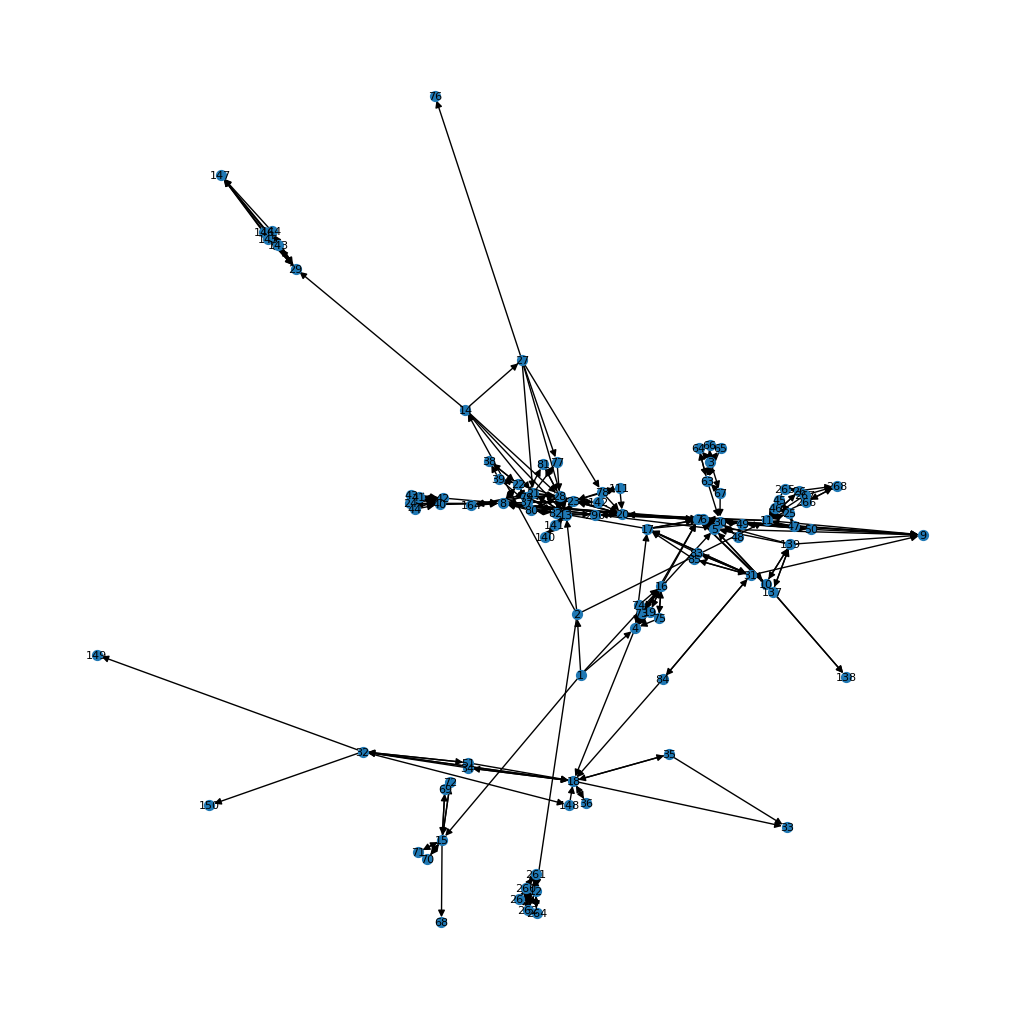

In [30]:
subgraph_nodes = list(loaded_graph.nodes())[:100]
subgraph = loaded_graph.subgraph(subgraph_nodes)

plt.figure(figsize=(10, 10))
nx.draw(subgraph, with_labels=True, node_size=50, font_size=8)
plt.show()

# Network Topology Analysis

### Degree Distribution

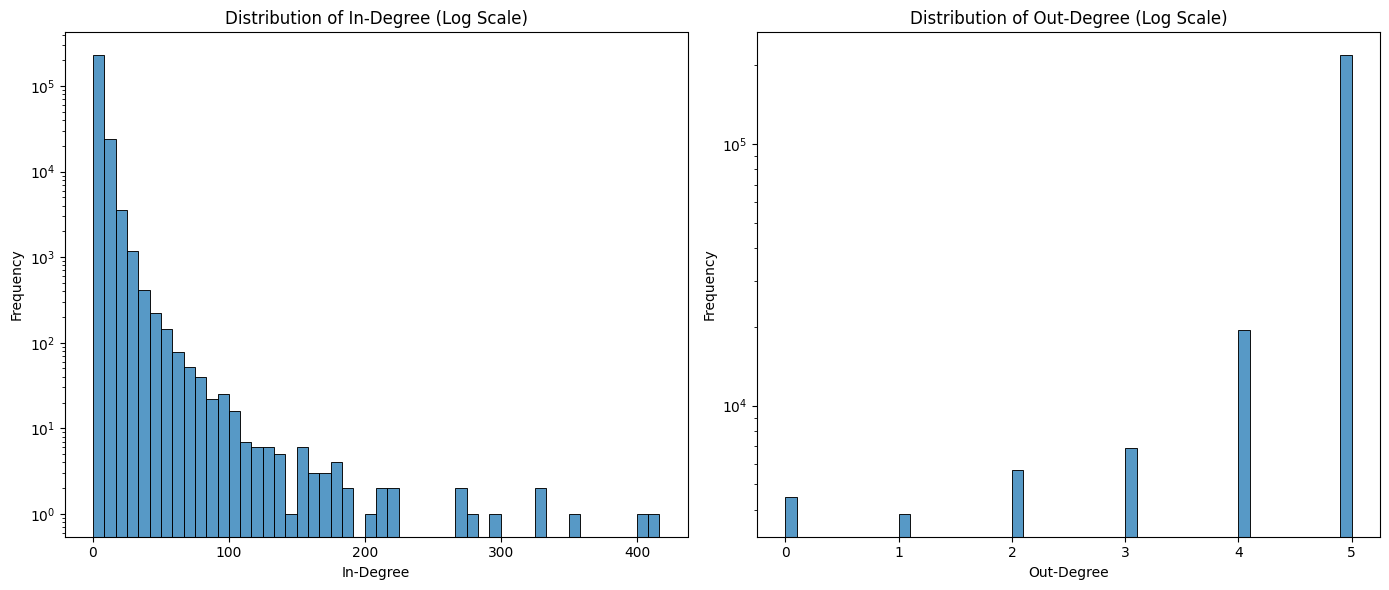

In [31]:
in_degree_counts = pd.Series([degree for node, degree in loaded_graph.in_degree()])
out_degree_counts = pd.Series([degree for node, degree in loaded_graph.out_degree()])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(in_degree_counts, bins=50, log=True, ax=axes[0])
axes[0].set_title('Distribution of In-Degree (Log Scale)')
axes[0].set_xlabel('In-Degree')
axes[0].set_ylabel('Frequency')

sns.histplot(out_degree_counts, bins=50, log=True, ax=axes[1])
axes[1].set_title('Distribution of Out-Degree (Log Scale)')
axes[1].set_xlabel('Out-Degree')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Connected components

Number of weakly connected components: 22


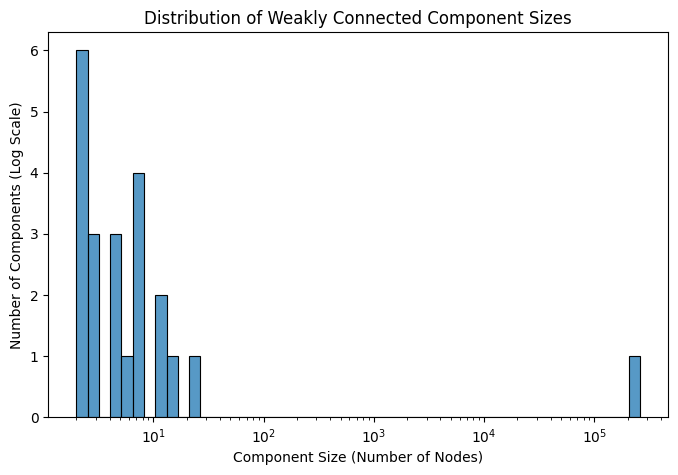

Largest weakly connected component size: 258968
Proportion of nodes in largest component: 99.95%


In [32]:
weakly_connected_components = list(nx.weakly_connected_components(loaded_graph))
num_weakly_connected_components = nx.number_weakly_connected_components(loaded_graph)
size_weakly_connected_components = [len(c) for c in weakly_connected_components]

print(f"Number of weakly connected components: {num_weakly_connected_components}")

plt.figure(figsize=(8, 5))
sns.histplot(size_weakly_connected_components, bins=50, log_scale=True, kde=False)
plt.xlabel("Component Size (Number of Nodes)")
plt.ylabel("Number of Components (Log Scale)")
plt.title("Distribution of Weakly Connected Component Sizes")
plt.show()

largest_component_size = max(size_weakly_connected_components)
print(f"Largest weakly connected component size: {largest_component_size}")
proportion_nodes_in_largest_component = largest_component_size / loaded_graph.number_of_nodes()
print(f"Proportion of nodes in largest component: {proportion_nodes_in_largest_component:.2%}")

### Path lengths, diameter, average path length

Selain dari dataset dengan 259102 nodes and 1207337 edges yang membutuhkan komputasional yang sangat mahal. Dari graph dataset dan graf connected component size dapat dilihat bahwa graf tersebut merupakan directed graph yang dimana lebih kompleks dibandingkan dengan undirected graf karena harus mempertimbangkan arah dari setiap edge sehingga jika adanya cycles atau unreachable nodes jadi perhitungan untuk shortest path tidak terdefinisi untuk beberapa node. Kemudian dari graf connected component size terdapat 22 weakly connected components yang membuat perhitungan Path lengths, diameter, dan average path length semakin sulit dikarenakan dengan adanya weakly connected components perhitungan metrik tersebut harus dihitung secara terpisah untuk setiap komponen.

In [33]:


# try:
#     # path_lengths_LCC = [length for source, target, length in nx.shortest_path_length(loaded_graph)]

# diameter_LCC = nx.diameter(loaded_graph)
# avg_path_length_LCC = nx.average_shortest_path_length(loaded_graph)

# print(f"Diameter of the Largest Connected Component: {diameter_LCC}")
# print(f"Average path length of the Largest Connected Component: {avg_path_length_LCC:.4f}")
#     # plt.figure(figsize=(8, 5))
#     # sns.histplot(path_lengths_LCC, bins=50, kde=True)
#     # plt.title('Distribution of Shortest Path Lengths (Largest Connected Component)')
#     # plt.xlabel('Path Length')
#     # plt.ylabel('Frequency')
#     # plt.show()

# except nx.NetworkXError as e:
#     print(f"Error calculating path lengths, diameter, average path length for LCC: {e}")
#     print("Path length calculations might still be taking too long, even for the largest component.")

### Clustering coefficient

In [34]:
clustering_coeff = nx.clustering(loaded_graph)
print("Clustering coefficient for each node:")
for node, centrality in clustering_coeff.items():
    print(f"Node {node}: Clustering Coefficient = {centrality:.4f}")

KeyboardInterrupt: 

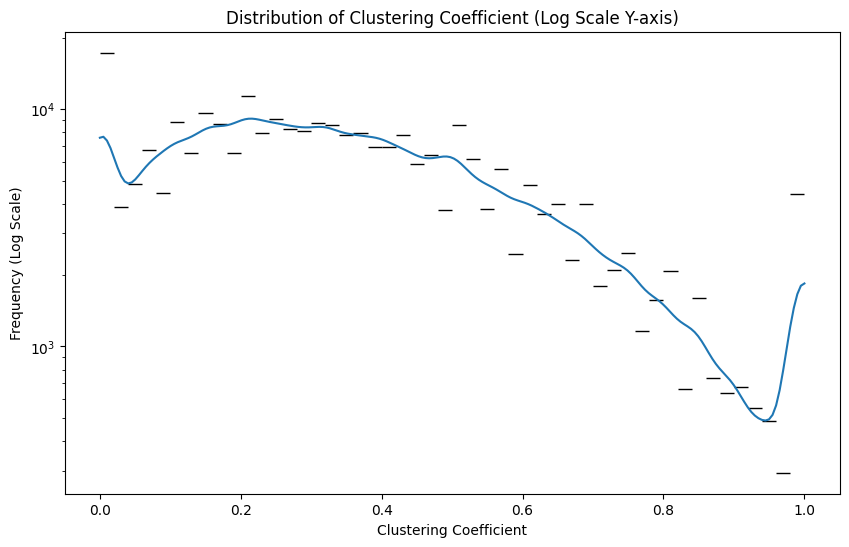

In [ ]:
clustering_coeff_values = list(clustering_coeff.values())

plt.figure(figsize=(10, 6))
sns.histplot(clustering_coeff_values, bins=50, kde=True, log_scale=(False, True)) 
plt.title('Distribution of Clustering Coefficient (Log Scale Y-axis)')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency (Log Scale)')
plt.show()

### Average Clustering coefficient

In [ ]:
avg_clustering_coeff = nx.average_clustering(loaded_graph)
print(f"Average clustering coefficient: {avg_clustering_coeff:.4f}")

Average clustering coefficient: 0.3464


# Centrality Measures

### Degree Centrality

In [ ]:
degree_centrality = nx.degree_centrality(loaded_graph)
top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 nodes by Degree Centrality:")
for node, centrality in top_degree_centrality:
    print(f"Node {node}: Centrality {centrality:.4f}")


Top 5 nodes by Degree Centrality:
Node 14949: Centrality 0.0016
Node 4429: Centrality 0.0016
Node 33: Centrality 0.0014
Node 10519: Centrality 0.0013
Node 12771: Centrality 0.0013


Dari hasil yang didapatkan nilai tersebut sangat kecil berarti node tersebut mempunyai beberapa koneksi relatif terhadap jumlah total node ini menandakan bahwa graph tersebut sangat besar dan sparsely connected. Selanjutnya dengan nilai degree centrality tertinggi adalah 0.0016 maka bahwa node yang terhubung hanya terhubung ke sebagian kecil dari total graf.

### Betweenness Centrality (sample for large graphs)

In [ ]:
betweenness_centrality = nx.betweenness_centrality(loaded_graph)
top_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 nodes by Betweenness Centrality (Sampled):")
for node, centrality in top_betweenness_centrality:
    print(f"Node {node}: Centrality {centrality:.4f}")


KeyboardInterrupt: 

### Eigenvector Centrality / PageRank

In [ ]:
pagerank_centrality = nx.pagerank(loaded_graph)
top_pagerank_centrality = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 nodes by PageRank Centrality:")
for node, centrality in top_pagerank_centrality:
    print(f"Node {node}: Centrality {centrality:.4f}")


Top 5 nodes by PageRank Centrality:
Node 4429: Centrality 0.0005
Node 33: Centrality 0.0005
Node 8: Centrality 0.0004
Node 93: Centrality 0.0003
Node 481: Centrality 0.0003


Jumlah nilai PageRank dalam grafik selalu 1, Node 4429 dan Node 33 mempunyai skor PageRank tertinggi, Ini berarti bahwa node tersebut mempunyai link dari node yang penting atau well-connected nodes. Dengan Degree centrality, node diukur berdasarkan jumlah connections. Sedangkan PageRank centrality nodes diukur berdasarkan kualitas link yang masuk. node dengan banyak koneksi mungkin tidak selalu memiliki PageRank yang tinggi jika koneksinya berasal dari node dengan peringkat rendah.

### Closeness Centrality (sample for large graphs, and handling disconnected components)

In [ ]:
largest_wcc = max(nx.weakly_connected_components(loaded_graph), key=len)
subgraph = loaded_graph.subgraph(largest_wcc)
closeness_centrality = nx.closeness_centrality(subgraph)

closeness_centrality = nx.closeness_centrality(loaded_graph)
top_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 nodes by Closeness Centrality:")
for node, centrality in top_closeness_centrality:
    print(f"Node {node}: Centrality {centrality:.4f}")

KeyboardInterrupt: 